# Big Entropy and the Generalised Linear Model

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pymc3 as pm
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
%matplotlib inline

In [3]:
sns.set()

## Maximum Entropy

### 9.1

In [4]:
p = {"A": np.array([0, 0, 10, 0, 0]),
     "B": np.array([0, 1, 8, 1, 0]),
     "C": np.array([0, 2, 6, 2, 0]),
     "D": np.array([1, 2, 4, 2, 1]),
     "E": np.array([2, 2, 2, 2, 2])}

### 9.2

In [5]:
p_norm = {k: v/10 for (k, v) in p.items()}

### 9.3

In [6]:
H = {k: -sum(np.where(v != 0, v * np.log(v), 0)) for (k, v) in p_norm.items()}
pd.Series(H)

A   -0.000000
B    0.639032
C    0.950271
D    1.470808
E    1.609438
dtype: float64

### 9.4

In [7]:
ways = np.array([1, 90, 1260, 37800, 113400])
logwayspp = np.log(ways)/10

### 9.5

In [8]:
p = np.array([[1/4, 1/4, 1/4, 1/4],
              [2/6, 1/6, 1/6, 2/6],
              [1/6, 2/6, 2/6, 1/6],
              [1/8, 4/8, 2/8, 1/8]])
np.sum(np.multiply(p, np.array([0, 1, 1, 2]).T), axis=1)

array([1., 1., 1., 1.])

### 9.6

In [9]:
-np.sum(p * np.log(p), axis=1)

array([1.38629436, 1.32966135, 1.32966135, 1.21300757])

### 9.7

In [10]:
p = 0.7
A = np.array([(1-p)**2, p*(1-p), (1-p)*p, p**2])
A

array([0.09, 0.21, 0.21, 0.49])

### 9.8

In [11]:
-sum(A*np.log(A))

1.221728604109787

### 9.9

In [12]:
def sim_p(G=1.4):
    x123 = np.random.random(3)
    x4 = (G * np.sum(x123) - x123[1] - x123[2])/(2 - G)
    x1234 = np.concatenate([x123, [x4]])
    z = np.sum(x1234)
    p = x1234/z
    return (-np.sum(p*np.log(p)), p)

### 9.10

In [13]:
Hs = []
ps = []
for _ in range(int(1e5)):
    (H, p) = sim_p(1.4)
    Hs.append(H)
    ps.append(p)

/Users/sgodiwala/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


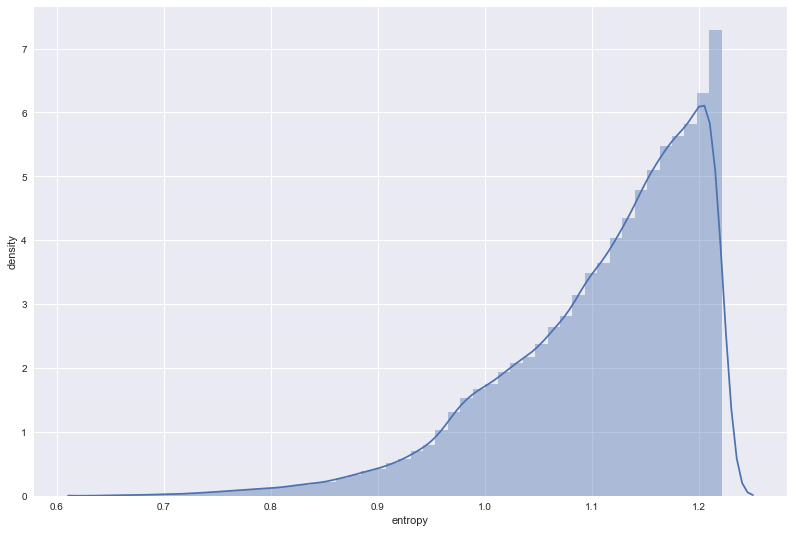

In [14]:
f, ax = plt.subplots(1, 1)
f.set_size_inches(13.5, 9)
sns.distplot(Hs, ax=ax)
ax.set_xlabel("entropy")
ax.set_ylabel("density");

### 9.11 - 9.12

In [15]:
max(Hs)

1.2217282076991038

### 9.13

In [16]:
ps[np.argmax(Hs)]

array([0.09016312, 0.20969585, 0.2099779 , 0.49016312])

## Generalised Linear Models

## Maximum Entropy Priors